In [13]:
import os
import sys
from pathlib import Path

# Notebook is in fraud_pipeline/notebooks, so project root is one level up
PROJECT_ROOT = Path.cwd().parents[0]
sys.path.append(str(PROJECT_ROOT))

print("Project root:", PROJECT_ROOT)
print("Python path includes:", PROJECT_ROOT)


Project root: /Users/nithinchaganty/fraud_pipeline
Python path includes: /Users/nithinchaganty/fraud_pipeline


In [14]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score

import joblib

BASE_DIR = Path(os.getcwd()).resolve().parents[0] if Path(os.getcwd()).name == "notebooks" else Path(os.getcwd())
print("Base directory:", BASE_DIR)

sys.path.append(str(BASE_DIR / "src"))

Base directory: /Users/nithinchaganty/fraud_pipeline


In [15]:
from src.config import TEST_SIZE, RANDOM_STATE
from src.data import load_raw_data
from src.features import build_features_and_target

from sklearn.model_selection import train_test_split

df = load_raw_data()
X, y = build_features_and_target(df)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    shuffle=False,
)

X_train.shape, X_test.shape

((227845, 30), (56962, 30))

In [16]:
models_dir = BASE_DIR / "models"

model = joblib.load(models_dir / "best_model.pkl")
feature_cols = joblib.load(models_dir / "feature_cols.pkl")
best_threshold = float(joblib.load(models_dir / "best_threshold.pkl"))

X_test_model = X_test[feature_cols]
proba = model.predict_proba(X_test_model)[:, 1]
len(proba)

56962

In [17]:
thresholds = np.linspace(0.01, 0.99, 50)

precisions = []
recalls = []
f1s = []

for t in thresholds:
    y_pred_t = (proba > t).astype(int)
    precisions.append(precision_score(y_test, y_pred_t, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_t, zero_division=0))
    f1s.append(f1_score(y_test, y_pred_t, zero_division=0))

best_idx = int(np.argmax(f1s))
print("Best threshold from sweep:", thresholds[best_idx])
print("F1 at best threshold:", f1s[best_idx])
print("Saved best_threshold:", best_threshold)

Best threshold from sweep: 0.9500000000000001
F1 at best threshold: 0.8235294117647058
Saved best_threshold: 0.9500000000000001


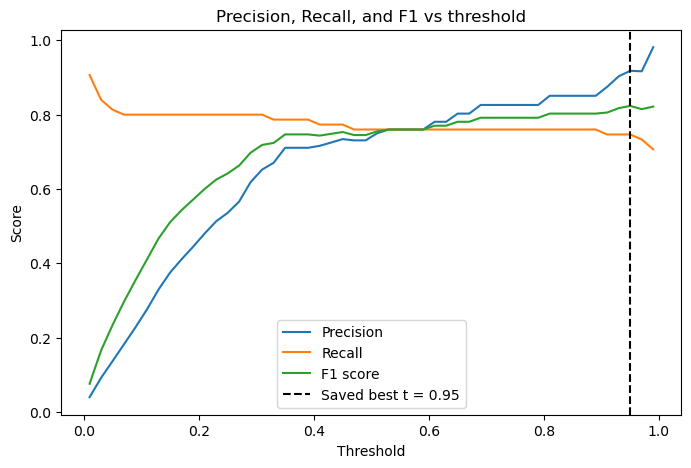

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 score")
plt.axvline(best_threshold, color="black", linestyle="--", label=f"Saved best t = {best_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 vs threshold")
plt.legend()
plt.show()